In [87]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [88]:
img = cv2.imread('ps1-input0.png', cv2.IMREAD_GRAYSCALE)
img.shape

(256, 256)

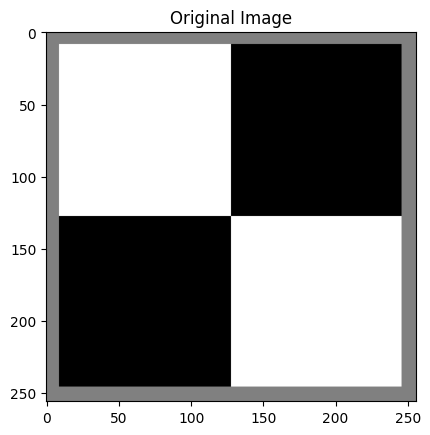

In [89]:
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.show()

In [121]:
def gradient_img(img):
    float_img = img.astype(np.float32)
    sobel_filter_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_filter_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    gradient_x = cv2.filter2D(float_img, ddepth=-1, kernel=sobel_filter_x)
    gradient_y = cv2.filter2D(float_img, ddepth=-1, kernel=sobel_filter_y)
    return gradient_x, gradient_y

def gaussian_kernel(kernel_size=5, sigma=1):
    kernel = np.zeros((kernel_size, kernel_size), dtype=np.float32)
    k = kernel_size // 2
    for x in range(-k, k+1):
        for y in range(-k, k+1):
            kernel[x+k, y+k] = (1/(2*np.pi*sigma**2)) * np.exp(-(x**2 + y**2) / (2*sigma**2))
    kernel /= kernel.sum()
    return kernel

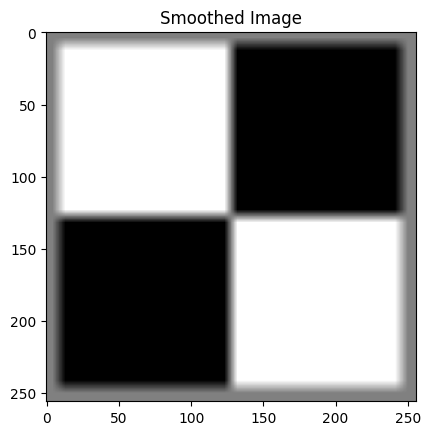

In [152]:
smooth_kernel = gaussian_kernel(9,10)
kernel_gradient_x, kernel_gradient_y =\
      gradient_img(smooth_kernel)
smoothed_img = cv2.filter2D(img, ddepth=-1, kernel=smooth_kernel)
plt.imshow(smoothed_img, cmap='gray')
plt.title('Smoothed Image')
plt.show()

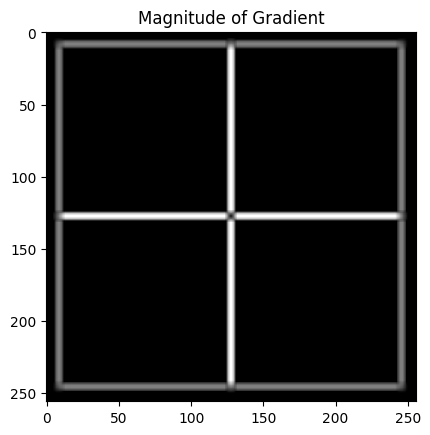

In [153]:
float_img = img.astype(np.float32)
img_magnitude_x = cv2.filter2D(float_img, ddepth=-1, kernel=kernel_gradient_x)
img_magnitude_y = cv2.filter2D(float_img, ddepth=-1, kernel=kernel_gradient_y)
img_magnitude = np.sqrt(img_magnitude_x ** 2 + img_magnitude_y ** 2)
img_theta = np.arctan2(img_magnitude_y, img_magnitude_x)
plt.imshow(img_magnitude, cmap='gray')
plt.title('Magnitude of Gradient')
plt.show()

In [154]:
def non_max_suppression(magnitude, theta):
    h, w = magnitude.shape
    result = np.zeros((h, w), dtype=np.float32)
    angle = theta * 180. / np.pi
    angle[angle < 0] += 180
    for i in range(1, h-1):
        for j in range(1, w-1):
            q = 255
            r = 255
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                q = magnitude[i, j+1]
                r = magnitude[i, j-1]
            elif (22.5 <= angle[i, j] < 67.5):
                q = magnitude[i+1, j-1]
                r = magnitude[i-1, j+1]
            elif (67.5 <= angle[i, j] < 112.5):
                q = magnitude[i+1, j]
                r = magnitude[i-1, j]
            elif (112.5 <= angle[i, j] < 157.5):
                q = magnitude[i-1, j-1]
                r = magnitude[i+1, j+1]
            if (magnitude[i, j] >= q) and (magnitude[i, j] >= r):
                result[i, j] = magnitude[i, j]
    return result

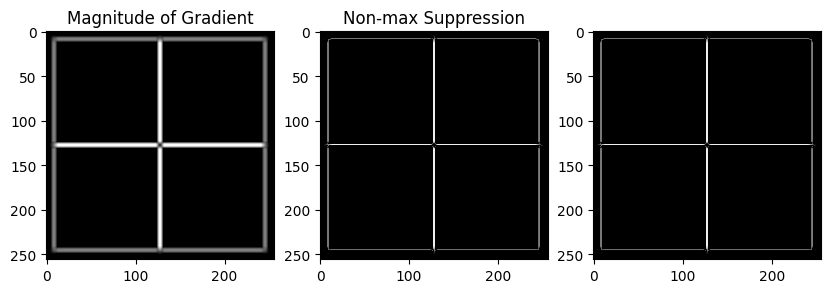

In [155]:
suppressed_img = non_max_suppression(img_magnitude, img_theta)
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(img_magnitude, cmap='gray', interpolation=None)
ax[0].set_title('Magnitude of Gradient')
ax[1].imshow(suppressed_img, cmap='gray', interpolation=None)
ax[1].set_title('Non-max Suppression')
ax[2].imshow(suppressed_img, cmap='gray')
plt.show()

In [156]:
def thresholding(img, low_threshold, high_threshold):
    h, w = img.shape
    result = np.zeros((h, w), dtype=np.float32)
    weak = 25
    strong = 255
    strong_i, strong_j = np.where(img >= high_threshold)
    weak_i, weak_j = np.where((img <= high_threshold) & (img >= low_threshold))
    result[strong_i, strong_j] = strong
    result[weak_i, weak_j] = weak
    return result

Text(0.5, 1.0, 'Thresholded Image')

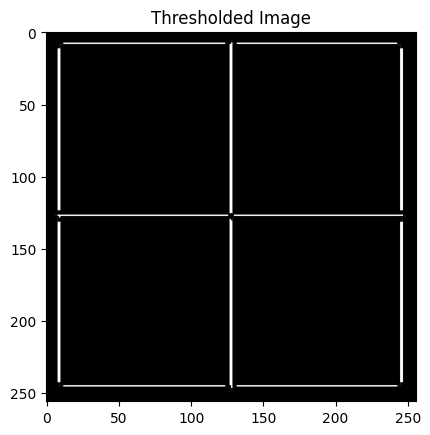

In [169]:
thresholded_img = thresholding(suppressed_img, 2,5)
plt.imshow(thresholded_img, cmap='gray')
plt.title('Thresholded Image')

In [159]:
suppressed_img.min(), suppressed_img.max()

(np.float32(0.0), np.float32(11.946888))